In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns
from scipy import stats
from scipy import stats
from scipy.stats import norm, skew #for some statistics
from scipy.stats import zscore
from scipy.stats import chi2_contingency
#import prince
from sklearn import preprocessing
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error as MSE
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import BaggingRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.metrics import r2_score as r2
from sklearn.metrics import mean_squared_log_error
from sklearn.svm import SVR
from math import sqrt
#from mlxtend.regressor import StackingCVRegressor

#pd.set_option('display.max_columns', None)
#pd.set_option('display.max_rows', None)

## Import Data

In [2]:
train_df = pd.read_csv('train.csv')
test_df = pd.read_csv('test.csv')

#train_df.dtypes
#train_df.columns
#test_df.head()
train_df

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1456,1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1457,1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,142125


OverallQual      0.790982
GrLivArea        0.708624
GarageCars       0.640409
GarageArea       0.623431
TotalBsmtSF      0.613581
1stFlrSF         0.605852
FullBath         0.560664
TotRmsAbvGrd     0.533723
YearBuilt        0.522897
YearRemodAdd     0.507101
GarageYrBlt      0.486362
MasVnrArea       0.477493
Fireplaces       0.466929
BsmtFinSF1       0.386420
LotFrontage      0.351799
WoodDeckSF       0.324413
2ndFlrSF         0.319334
OpenPorchSF      0.315856
HalfBath         0.284108
LotArea          0.263843
BsmtFullBath     0.227122
BsmtUnfSF        0.214479
BedroomAbvGr     0.168213
ScreenPorch      0.111447
PoolArea         0.092404
MoSold           0.046432
3SsnPorch        0.044584
BsmtFinSF2      -0.011378
BsmtHalfBath    -0.016844
MiscVal         -0.021190
LowQualFinSF    -0.025606
YrSold          -0.028923
OverallCond     -0.077856
MSSubClass      -0.084284
EnclosedPorch   -0.128578
KitchenAbvGr    -0.135907
Name: SalePrice, dtype: float64


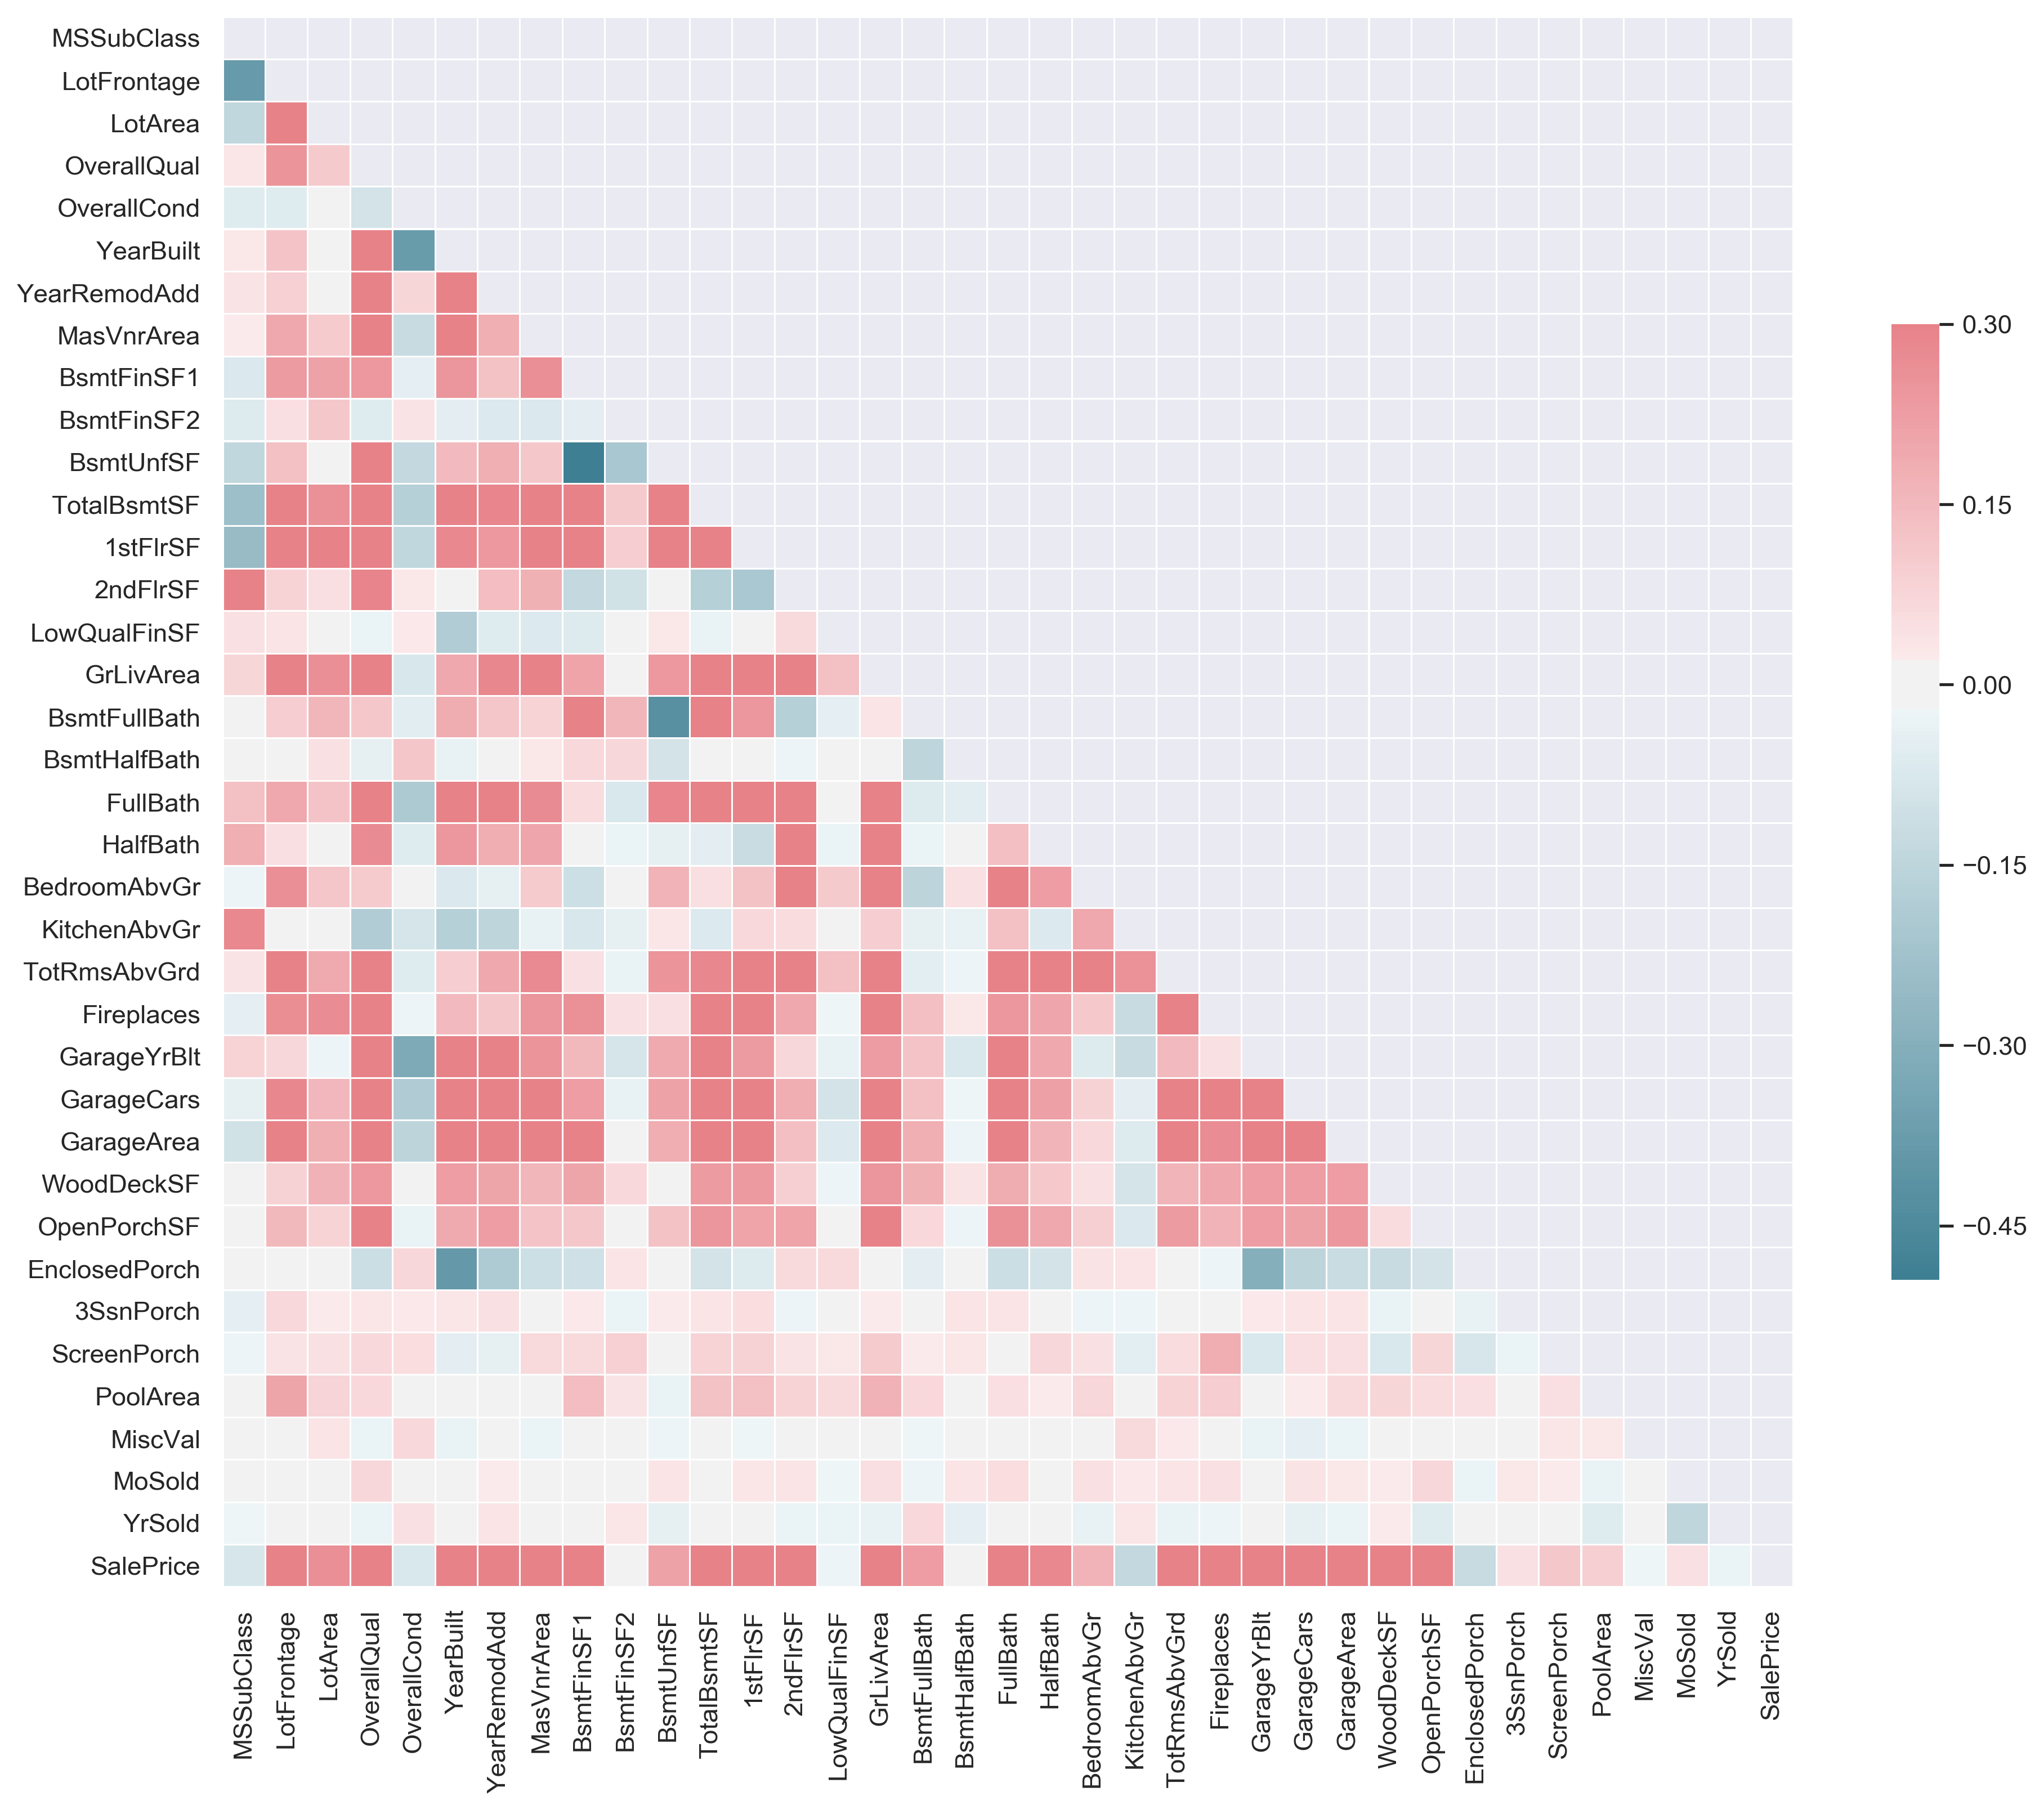

In [14]:
def dothecorrplot():
    corr = train_df.select_dtypes(include = ['float64', 'int64']).iloc[:,1:].corr()

    # Generate a mask for the upper triangle
    mask = np.triu(np.ones_like(corr, dtype=np.bool))
    # Generate a custom diverging colormap
    cmap = sns.diverging_palette(220, 10, as_cmap=True)

    # Set up the matplotlib figure
    f = plt.subplots(figsize=(15, 15),dpi=300)

    ax = sns.heatmap(corr, mask = mask, cmap=cmap, vmax=.3, center=0,
                square=True, linewidths=.5, cbar_kws={"shrink": .5})

    sns.set(style = 'white', font_scale=1) 

    # Fix top bottom half
    bottom, top = ax.get_ylim()
    ax.set_ylim(bottom + 0.5, top - 0.5)
    
    corr_list = corr['SalePrice'].sort_values(axis=0,ascending=False).iloc[1:]
    print(corr_list[:])
dothecorrplot()

/usr/local/anaconda3/lib/python3.7/site-packages/seaborn/axisgrid.py:2065: UserWarning: The `size` parameter has been renamed to `height`; pleaes update your code.
  warnings.warn(msg, UserWarning)


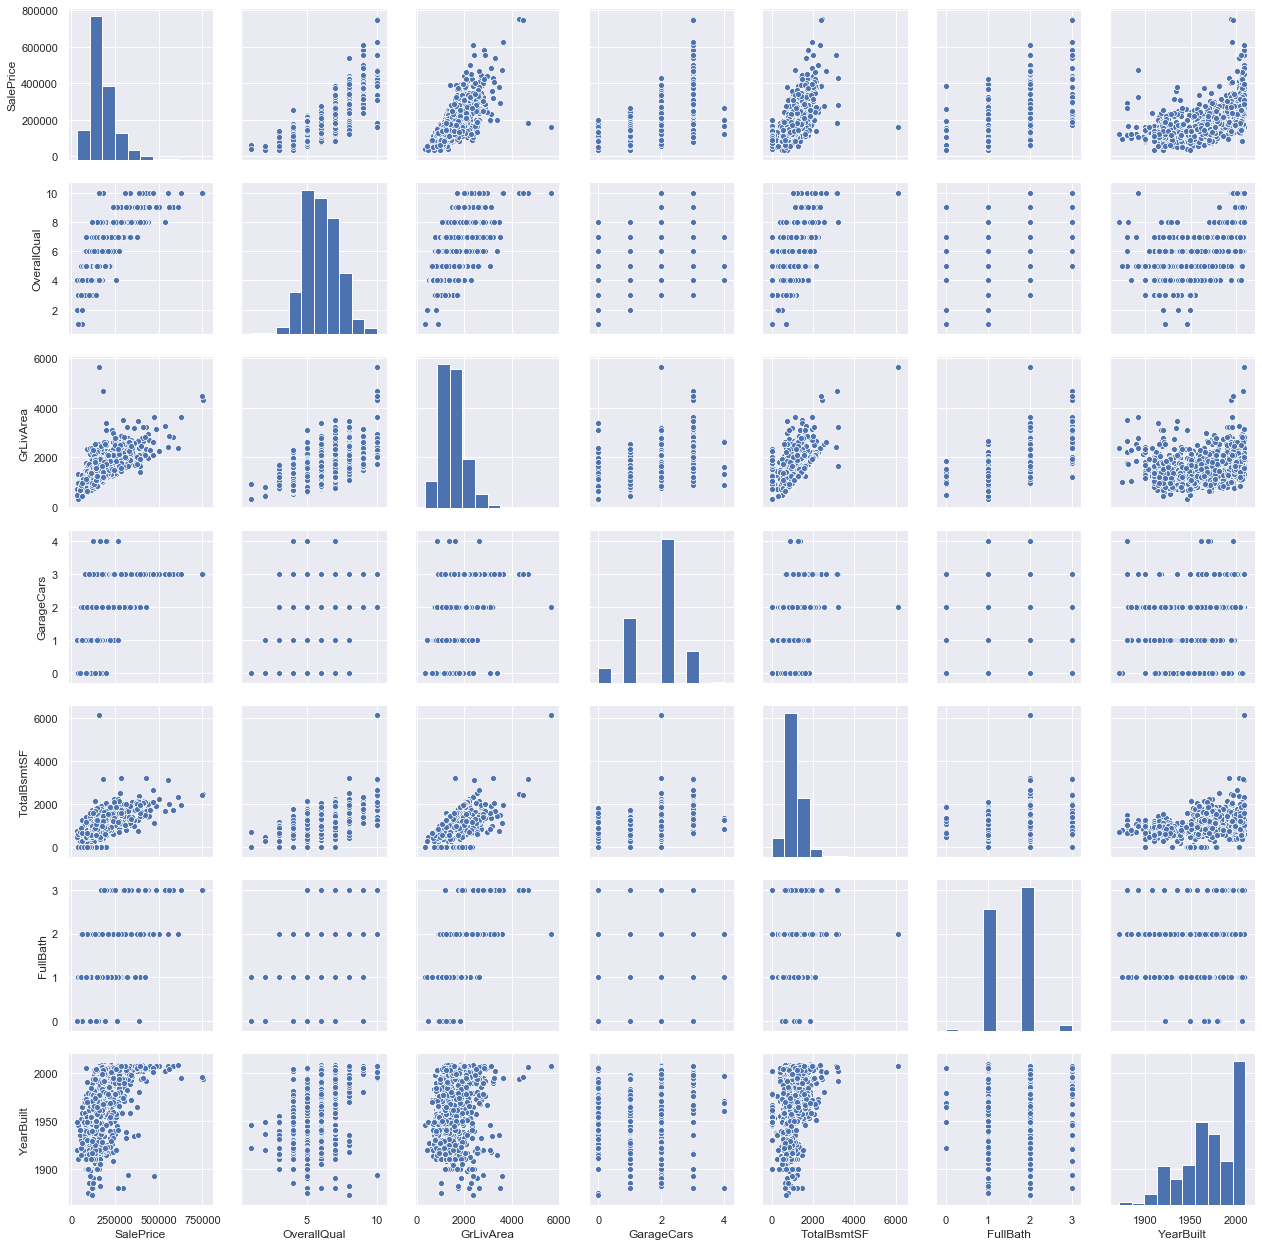

In [5]:
#scatterplot
sns.set()
cols = ['SalePrice', 'OverallQual', 'GrLivArea', 'GarageCars', 'TotalBsmtSF', 'FullBath', 'YearBuilt']
sns.pairplot(train_df[cols], size = 2.5)
plt.show();

In [7]:
#missing data
total = train_df.isnull().sum().sort_values(ascending=False)
percent = (train_df.isnull().sum()/train_df.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data.head(20)

,Total,Percent
PoolQC,1453,0.995205
MiscFeature,1406,0.963014
Alley,1369,0.937671
Fence,1179,0.807534
FireplaceQu,690,0.472603
LotFrontage,259,0.177397
GarageCond,81,0.055479
GarageType,81,0.055479
GarageYrBlt,81,0.055479
GarageFinish,81,0.055479


'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


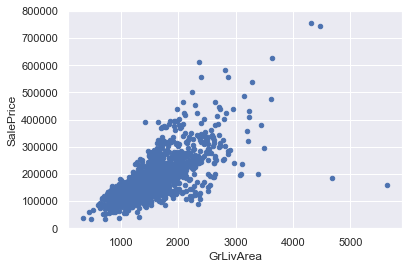

In [12]:
#bivariate analysis saleprice/grlivarea
var = 'GrLivArea'
data = pd.concat([train_df['SalePrice'], train_df[var]], axis=1)
data.plot.scatter(x=var, y='SalePrice', ylim=(0,800000));

## Fix Data 

From str to num

In [4]:
# Handling Outliers
#train_df.sort_values(by = 'GrLivArea', ascending = False)[:2]
train_df = train_df.drop(train_df[train_df['Id'] == 1299].index)
train_df = train_df.drop(train_df[train_df['Id'] == 524].index)
train_df = train_df.reset_index(drop=True)

# Combine train and test, separate SalePrice from rest of train
data_all = pd.concat([train_df,test_df],sort=False,ignore_index=True).drop(['SalePrice'], axis=1)

In [5]:
processed_df = data_all.copy()

for columnName in processed_df: # loop through columns
    columnSeriesObj = processed_df[columnName]

    if type(columnSeriesObj[0])==str or type(columnSeriesObj[0])==float: # find column with str or object
        # create replacement list
        uniq_value_of_col = []
        uniq_value_of_col = processed_df[columnName].unique()
        num_of_nums = len(uniq_value_of_col)
        replacement_list =  np.arange(num_of_nums)

        # replace elements of list
        processed_df[columnName]=processed_df[columnName].replace(uniq_value_of_col, replacement_list) # replace elements in column
    
processed_df

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1,60,0,65.0,8450,0,0,0,0,0,...,0,0,0,0,0,0,2,2008,0,0
1,2,20,0,80.0,9600,0,0,0,0,0,...,0,0,0,0,0,0,5,2007,0,0
2,3,60,0,68.0,11250,0,0,1,0,0,...,0,0,0,0,0,0,9,2008,0,0
3,4,70,0,60.0,9550,0,0,1,0,0,...,0,0,0,0,0,0,2,2006,0,1
4,5,60,0,84.0,14260,0,0,1,0,0,...,0,0,0,0,0,0,12,2008,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2912,2915,160,1,21.0,1936,0,0,0,0,0,...,0,0,0,0,0,0,6,2006,0,0
2913,2916,160,1,21.0,1894,0,0,0,0,0,...,0,0,0,0,0,0,4,2006,0,1
2914,2917,20,0,160.0,20000,0,0,0,0,0,...,0,0,0,0,0,0,9,2006,0,1
2915,2918,85,0,62.0,10441,0,0,0,0,0,...,0,0,0,1,1,700,7,2006,0,0


Fix missing values

In [107]:
# Remove 2 columns full of NaNs
processed_df=processed_df.drop(columns=['LotFrontage','GarageYrBlt'])

# Check for NaNs 
# findNaN = processed_df[processed_df.isna().any(axis=1)]

# Drop pretty uncorrelated columns         
processed_df=processed_df.drop(columns=['YrSold','LowQualFinSF','MiscVal','BsmtHalfBath','BsmtFinSF2'])

# Fill in stupid nan rows with mean..
processed_df = processed_df.fillna(processed_df.dropna().median())

processed_df

,Id,MSSubClass,MSZoning,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MoSold,SaleType,SaleCondition
0,1,60,0,8450,0,0,0,0,0,0,...,0,0,0,0,0,0,0,2,0,0
1,2,20,0,9600,0,0,0,0,0,1,...,0,0,0,0,0,0,0,5,0,0
2,3,60,0,11250,0,0,1,0,0,0,...,0,0,0,0,0,0,0,9,0,0
3,4,70,0,9550,0,0,1,0,0,2,...,272,0,0,0,0,0,0,2,0,1
4,5,60,0,14260,0,0,1,0,0,1,...,0,0,0,0,0,0,0,12,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2912,2915,160,1,1936,0,0,0,0,0,0,...,0,0,0,0,0,0,0,6,0,0
2913,2916,160,1,1894,0,0,0,0,0,0,...,0,0,0,0,0,0,0,4,0,1
2914,2917,20,0,20000,0,0,0,0,0,0,...,0,0,0,0,0,0,0,9,0,1
2915,2918,85,0,10441,0,0,0,0,0,0,...,0,0,0,0,0,1,1,7,0,0


## Create Model

Separate Train and Test Sets

In [108]:
dataset = processed_df.values
#train_df.shape

X_train = dataset[:len(train_df),1:]
X_test = dataset[len(train_df):,1:]
Y_train = train_df['SalePrice'].values

# Sanity Check
#print(X_train[-5:,:5],'\n\n',X_test[:5,:5],'\n\n',Y_train[:5])

Scale Data and Separate Train and Validation

In [128]:
from sklearn import preprocessing
from sklearn.model_selection import train_test_split

min_max_scaler = preprocessing.MinMaxScaler()
X_scale = min_max_scaler.fit_transform(X_train)

X_tr, X_val, Y_tr, Y_val = train_test_split(X_scale, Y_train, test_size=0.3)
print(X_tr.shape, X_val.shape, Y_tr.shape, Y_val.shape, X_test.shape,)


(1020, 72) (438, 72) (1020,) (438,) (1459, 72)


In [193]:
import tensorflow as tf
from tensorflow import keras


def create_model():
    # create model
    model = keras.Sequential()
    model.add(keras.layers.Dense(10, input_dim=X_tr.shape[1], activation='relu'))
    model.add(keras.layers.Dense(30, activation='relu'))
    model.add(keras.layers.Dense(40, activation='relu'))
    model.add(keras.layers.Dense(1))
    # Compile model
    model.compile(optimizer ='adam', loss = 'mean_squared_error', 
              metrics =['accuracy'])
    return model

model = create_model()
model.summary()

Model: "sequential_21"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_68 (Dense)             (None, 10)                730       
_________________________________________________________________
dense_69 (Dense)             (None, 30)                330       
_________________________________________________________________
dense_70 (Dense)             (None, 40)                1240      
_________________________________________________________________
dense_71 (Dense)             (None, 1)                 41        
Total params: 2,341
Trainable params: 2,341
Non-trainable params: 0
_________________________________________________________________


In [194]:
X_tr.shape[1]

72

In [195]:
history = model.fit(X_tr, Y_tr, validation_data=(X_val,Y_val), epochs=150, batch_size=32)

Train on 1020 samples, validate on 438 samples
Epoch 1/150
1020/1020 [==============================] - 0s 387us/sample - loss: 40849252625.0667 - accuracy: 0.0000e+00 - val_loss: 34865048720.9498 - val_accuracy: 0.0000e+00
Epoch 2/150
1020/1020 [==============================] - 0s 57us/sample - loss: 40848050071.5922 - accuracy: 0.0000e+00 - val_loss: 34862804870.4292 - val_accuracy: 0.0000e+00
Epoch 3/150
1020/1020 [==============================] - 0s 54us/sample - loss: 40842858287.1843 - accuracy: 0.0000e+00 - val_loss: 34853943726.1735 - val_accuracy: 0.0000e+00
Epoch 4/150
1020/1020 [==============================] - 0s 56us/sample - loss: 40825129915.7333 - accuracy: 0.0000e+00 - val_loss: 34827133292.7123 - val_accuracy: 0.0000e+00
Epoch 5/150
1020/1020 [==============================] - 0s 59us/sample - loss: 40778581397.5843 - accuracy: 0.0000e+00 - val_loss: 34762964487.0137 - val_accuracy: 0.0000e+00
Epoch 6/150
1020/1020 [==============================] - 0s 56us/sample 

Epoch 94/150
1020/1020 [==============================] - 0s 54us/sample - loss: 1742777952.8784 - accuracy: 0.0000e+00 - val_loss: 1185897812.1644 - val_accuracy: 0.0000e+00
Epoch 95/150
1020/1020 [==============================] - 0s 55us/sample - loss: 1724417147.4824 - accuracy: 0.0000e+00 - val_loss: 1174819925.9178 - val_accuracy: 0.0000e+00
Epoch 96/150
1020/1020 [==============================] - 0s 55us/sample - loss: 1705904334.3059 - accuracy: 0.0000e+00 - val_loss: 1163331864.5479 - val_accuracy: 0.0000e+00
Epoch 97/150
1020/1020 [==============================] - 0s 55us/sample - loss: 1689905951.6235 - accuracy: 0.0000e+00 - val_loss: 1148738115.2146 - val_accuracy: 0.0000e+00
Epoch 98/150
1020/1020 [==============================] - 0s 54us/sample - loss: 1672110375.6549 - accuracy: 0.0000e+00 - val_loss: 1135415526.2831 - val_accuracy: 0.0000e+00
Epoch 99/150
1020/1020 [==============================] - 0s 57us/sample - loss: 1656761830.6510 - accuracy: 0.0000e+00 - val

Epoch 141/150
1020/1020 [==============================] - 0s 55us/sample - loss: 1265941824.0000 - accuracy: 0.0000e+00 - val_loss: 952482245.5525 - val_accuracy: 0.0000e+00
Epoch 142/150
1020/1020 [==============================] - 0s 58us/sample - loss: 1260921669.5216 - accuracy: 0.0000e+00 - val_loss: 949312828.2009 - val_accuracy: 0.0000e+00
Epoch 143/150
1020/1020 [==============================] - 0s 56us/sample - loss: 1255251111.6549 - accuracy: 0.0000e+00 - val_loss: 945254998.5023 - val_accuracy: 0.0000e+00
Epoch 144/150
1020/1020 [==============================] - 0s 56us/sample - loss: 1248906402.1333 - accuracy: 0.0000e+00 - val_loss: 939121478.1370 - val_accuracy: 0.0000e+00
Epoch 145/150
1020/1020 [==============================] - 0s 55us/sample - loss: 1242604072.6588 - accuracy: 0.0000e+00 - val_loss: 934207101.6621 - val_accuracy: 0.0000e+00
Epoch 146/150
1020/1020 [==============================] - 0s 56us/sample - loss: 1238338634.0392 - accuracy: 0.0000e+00 - va

In [183]:
predictions = model.predict(X_tr)
predictions

array([[1.],
       [1.],
       [1.],
       ...,
       [1.],
       [1.],
       [1.]], dtype=float32)